## TTT (Tic Tac Toe) Skittles

In [1]:
%pylab inline
from Game import *
from Game.minimax import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.2.15


Functions for the Game

In [2]:
def initial_state():
    state=Board(3,3)
    state.pieces=['.','X','O']
    
        
    return state

In [3]:
def update_state(state,player,move):
    new_state=state
    new_state[move]=player
    return new_state

In [4]:
def win_status(state,player):
    # this will be a bit longer
    
#     0 | 1 | 2
#     ---------
#     3 | 4 | 5
#     ---------
#     6 | 7 | 8
    

    if state[0]==player and state[4]==player and state[8]==player:
        return 'win'
    if state[2]==player and state[4]==player and state[6]==player:
        return 'win'
    if state[0]==player and state[1]==player and state[2]==player:
        return 'win'
    if state[3]==player and state[4]==player and state[5]==player:
        return 'win'
    if state[6]==player and state[7]==player and state[8]==player:
        return 'win'
    if state[0]==player and state[3]==player and state[6]==player:
        return 'win'
    if state[1]==player and state[4]==player and state[7]==player:
        return 'win'
    if state[2]==player and state[5]==player and state[8]==player:
        return 'win'
    
    if player==1:
        other_player=2
    else:
        other_player=1
    
    
    if not valid_moves(state,other_player):
        return 'stalemate'
    
    
    

In [5]:
def valid_moves(state,player):

    moves=[]  # no valid moves
    for i in range(9):
        if state[i]==0:
            moves.append(i)
    
    return moves

In [6]:
def show_state(state):
    print(state[0],'|',state[1],'|',state[2])
    print("--+---+---")
    print(state[3],'|',state[4],'|',state[5])
    print("--+---+---")
    print(state[6],'|',state[7],'|',state[8])


Move Functions for the Agents

In [7]:
def random_move(state,player):
    moves=valid_moves(state,player)
    return random.choice(moves)

In [8]:
def get_human_move(state,player):
    print("Locations:")
    print("    0 | 1 | 2")
    print("    ---------")
    print("    3 | 4 | 5")
    print("    ---------")
    print("    6 | 7 | 8")
    
    while True:
        
        move=input('What square do you want to move to?')
        move=int(move)

        if move in valid_moves(state,player):
            break
        else:
            print("You messed up!")
    
    return move



In [9]:
human_agent=Agent(get_human_move)
random_agent=Agent(random_move)

In [10]:
def minimax_move(state,player):

    values,moves=minimax_values(state,player)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [11]:
def skittles_move(state,player,info):

    S=info.S
    last_state=info.last_state
    last_action=info.last_action

    stateint=int(state) # use only when accessing table
    if not stateint in S:  # if we haven't seen this state before
        S[stateint]=Table()
        for action in valid_moves(state,player):
            S[stateint][action]=2
       
    move=weighted_choice(S[stateint])
    
    # if there are no weights at all for a state, then the move will be None
    
    if move is None:
        
        if last_state:
            last_stateint=int(last_state)
            S[last_stateint][last_action]-=1
            if S[last_stateint][last_action]<0:
                S[last_stateint][last_action]=0
            
        return random_move(state,player)
    
    return move

In [12]:
def skittles_after(status,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action
    
    if status=='lose':
        last_stateint=int(last_state)
        S[last_stateint][last_action]-=1
        if S[last_stateint][last_action]<0:
            S[last_stateint][last_action]=0
            

In [13]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.S=LoadTable("TTT Skittles 1 Int.json")
skittles_agent1.post=skittles_after


skittles_agent2=Agent(skittles_move)
skittles_agent2.S=LoadTable("TTT Skittles 2 Int.json")
skittles_agent2.post=skittles_after

### Running the Game - Random vs Skittles 2

In [14]:
W=[]
L=[]
T=[]

n=[]
total_games=0
for i in range(100):
    g=Game(number_of_games=1000)
    g.display=False
    result=g.run(random_agent,skittles_agent2)

    SaveTable(skittles_agent1.S,"TTT Skittles 1 Int.json")
    SaveTable(skittles_agent2.S,"TTT Skittles 2 Int.json")

    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100

    total_games+=g.number_of_games
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    print('%.2f' % percent_wins," ",end="")

57.80  51.50  50.80  49.40  47.30  43.30  42.20  42.10  39.20  37.30  32.80  33.30  30.20  30.00  26.20  23.00  21.40  20.30  16.80  16.20  11.20  10.40  10.80  8.20  7.90  7.60  8.00  5.90  5.80  4.20  5.10  5.00  3.00  2.20  2.60  2.90  2.40  3.20  3.20  2.00  2.60  1.90  1.90  1.60  1.90  2.00  2.20  1.70  1.20  0.90  1.30  1.40  1.10  1.50  1.10  1.30  0.60  1.00  1.40  0.90  0.30  0.50  0.90  1.20  0.40  0.50  0.10  0.50  0.90  0.30  0.90  0.40  0.20  0.50  0.50  0.40  0.20  0.60  0.40  0.10  0.10  0.40  0.60  0.10  0.20  0.10  0.00  0.00  0.10  0.30  0.10  0.00  0.10  0.10  0.30  0.10  0.00  0.10  0.10  0.00  

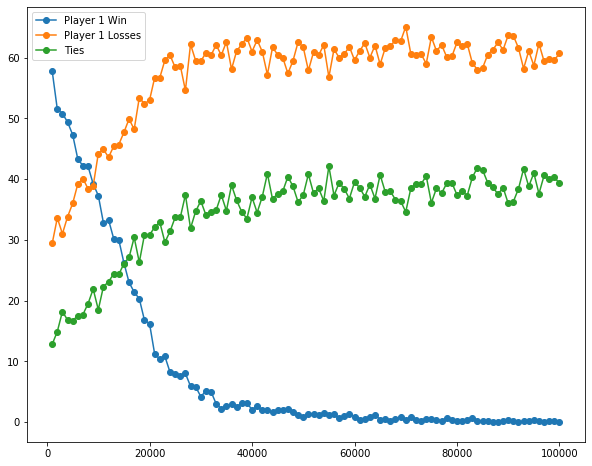

In [15]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Win')
plot(n,L,'-o',label='Player 1 Losses')
plot(n,T,'-o',label='Ties')
legend()

### Testing minimax vs trained Skittles 2 - should be all "tied"

In [16]:
g=Game(number_of_games=3)
g.display=False
result=g.run(minimax_agent,skittles_agent2)

  Choice Time: 2.6614861488342285 seconds 
  Choice Time: 0.13306212425231934 seconds 
  Choice Time: 0.008337974548339844 seconds 
  Choice Time: 0.0008950233459472656 seconds 
  Choice Time: 7.987022399902344e-05 seconds 
  Choice Time: 2.653259038925171 seconds 
  Choice Time: 0.1351909637451172 seconds 
  Choice Time: 0.008598804473876953 seconds 
  Choice Time: 0.0015208721160888672 seconds 
  Choice Time: 0.00011587142944335938 seconds 
  Choice Time: 2.6725170612335205 seconds 
  Choice Time: 0.13663816452026367 seconds 
  Choice Time: 0.010488033294677734 seconds 
  Choice Time: 0.0013158321380615234 seconds 
  Choice Time: 0.00011610984802246094 seconds 


In [17]:
result

[0, 0, 0]

### Running the Game - naive Skittles 1 vs trained Skittles 2

In [18]:
W=[]
L=[]
T=[]

n=[]
total_games=0
for i in range(100):
    g=Game(number_of_games=1000)
    g.display=False
    result=g.run(skittles_agent1,skittles_agent2)

    SaveTable(skittles_agent1.S,"TTT Skittles 1 Int.json")
    SaveTable(skittles_agent2.S,"TTT Skittles 2 Int.json")

    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100

    total_games+=g.number_of_games
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    print('%.2f' % percent_wins," ",end="")

0.20  0.10  0.20  0.10  0.00  0.00  0.00  0.10  0.00  0.00  0.00  0.00  0.20  0.10  0.00  0.30  0.10  0.00  0.10  0.00  0.00  0.00  0.00  0.20  0.00  0.00  0.10  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

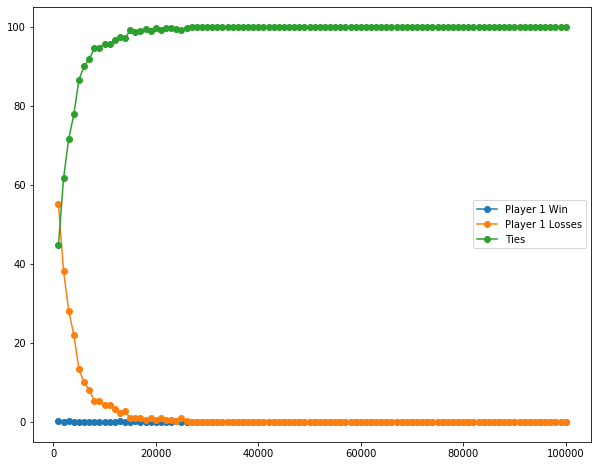

In [19]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Win')
plot(n,L,'-o',label='Player 1 Losses')
plot(n,T,'-o',label='Ties')
legend()

### Running the Game - naive Skittles 1 vs naive Skittles 2

In [20]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.S=Table()            # start with a blank table
skittles_agent1.post=skittles_after


skittles_agent2=Agent(skittles_move)
skittles_agent2.S=Table()            # start with a blank table
skittles_agent2.post=skittles_after

In [21]:
W=[]
L=[]
T=[]

n=[]
total_games=0
for i in range(100):
    g=Game(number_of_games=1000)
    g.display=False
    result=g.run(skittles_agent1,skittles_agent2)

    SaveTable(skittles_agent1.S,"TTT Skittles 1 Int.json")
    SaveTable(skittles_agent2.S,"TTT Skittles 2 Int.json")

    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100

    total_games+=g.number_of_games
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    print('%.2f' % percent_wins," ",end="")

57.90  58.60  52.00  51.70  51.20  47.30  46.70  45.60  43.20  43.80  39.80  42.90  38.10  33.30  33.80  24.80  19.60  14.30  12.90  9.80  8.10  6.20  6.40  4.30  4.10  3.50  3.30  3.40  2.30  1.50  1.50  1.80  1.70  1.40  1.10  0.80  0.70  0.60  0.60  0.50  0.40  0.40  0.20  0.10  0.40  0.10  0.10  0.10  0.10  0.10  0.00  0.10  0.00  0.20  0.00  0.10  0.10  0.00  0.10  0.10  0.00  0.10  0.00  0.00  0.00  0.00  0.00  0.00  0.10  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

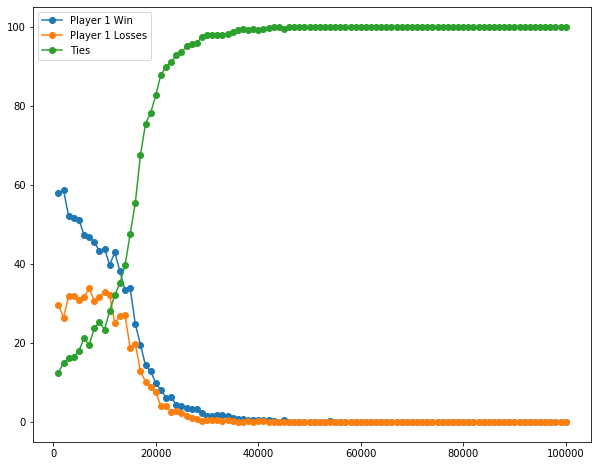

In [22]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Win')
plot(n,L,'-o',label='Player 1 Losses')
plot(n,T,'-o',label='Ties')
legend()

In [25]:
import pickle
s=pickle.dumps(skittles_agent1.S)
print(len(s))

77188
